In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import wbdata
import matplotlib.pyplot as plt
import scipy.stats as st
from sympy import *
import time as dt
from sklearn.linear_model import LinearRegression
import warnings
from IPython.display import Math,Latex
from pandas.errors import SettingWithCopyWarning
from statsmodels.api import *
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures,StandardScaler,MinMaxScaler

init_printing(use_unicode=True,use_latex=True)


In [65]:
country = 'IND'
indicators = {
    #'NY.GDP.DEFL.KD.ZG': 'Inflation rate',
    'SL.GDP.PCAP.EM.KD': 'Inflation rate',
    'SL.UEM.TOTL.ZS': 'Unemployment rate',
}
data = wbdata.get_dataframe(indicators, country=country )

#data = data.loc['2018':'2004']

data = data.dropna().sort_values('date')
data['Inflation rate']=[100*(np.array(data['Inflation rate'])[i]-np.array(data['Inflation rate'])[i-1])/np.array(data['Inflation rate'])[i-1] for i in range(len(np.array(data['Inflation rate'])))]
data

,Inflation rate,Unemployment rate
date,,
1991,-70.201066,6.850
1992,2.998063,6.853
1993,2.276106,6.859
1994,4.092523,6.828
1995,4.181918,6.990
1996,4.165203,7.147
1997,0.793860,7.335
1998,2.881656,7.517
1999,5.480701,7.682


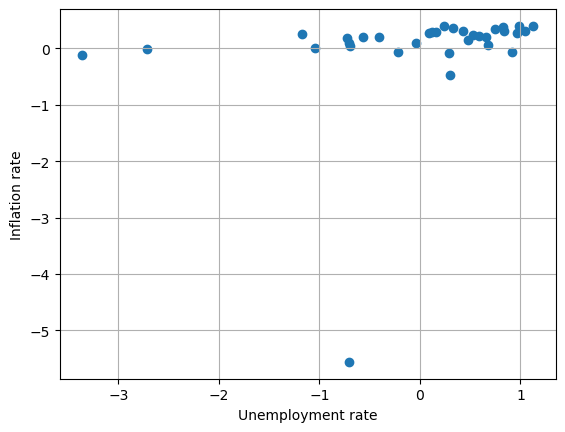

In [75]:
'''s=MinMaxScaler()
x=s.fit_transform(data[['Unemployment rate']])
s=MinMaxScaler()
y=s.fit_transform(data[['Inflation rate']])

'''
s=StandardScaler()
x=s.fit_transform(data[['Unemployment rate']])
s=StandardScaler()
y=s.fit_transform(data[['Inflation rate']])


plt.xlabel('Unemployment rate')
plt.ylabel('Inflation rate')
plt.grid()
plt.scatter(x,y)
plt.show()

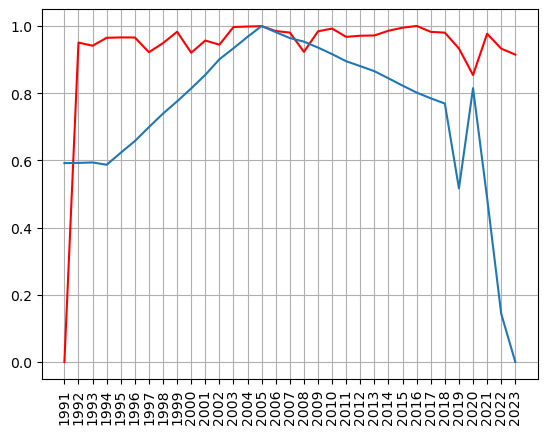

In [67]:
plt.plot(data.index,y,color='r')
plt.plot(data.index,x)
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [68]:
model = OLS(x,y).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.909
Model:                            OLS   Adj. R-squared (uncentered):              0.906
Method:                 Least Squares   F-statistic:                              318.8
Date:                Fri, 25 Oct 2024   Prob (F-statistic):                    3.36e-18
Time:                        21:48:11   Log-Likelihood:                         0.83246
No. Observations:                  33   AIC:                                     0.3351
Df Residuals:                      32   BIC:                                      1.832
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.7856      0.044     17.855      0.000       0.696       0.875
==============================================================================
Omnibus:                       12.289   Durbin-Watson:                   0.575
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               14.185
Skew:                          -1.006   Prob(JB):                     0.000831
Kurtosis:                       5.503   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
scaled_data=pd.DataFrame(np.column_stack((x,y)),columns=[['X','Y']])
scaled_data['lnX']=np.log(scaled_data['X'])
scaled_data['lnY']=np.log(scaled_data['Y'])
scaled_data

c:\Users\ivant\anaconda3\Lib\site-packages\pandas\core\internals\blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
c:\Users\ivant\anaconda3\Lib\site-packages\pandas\core\internals\blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


,X,Y,lnX,lnY
0,0.591823,0.000000,-0.524547,-inf
1,0.592486,0.950591,-0.523428,-0.050672
2,0.593812,0.941215,-0.521192,-0.060583
3,0.586961,0.964804,-0.532796,-0.035830
4,0.622762,0.965965,-0.473590,-0.034628
5,0.657459,0.965748,-0.419374,-0.034853
6,0.699006,0.921966,-0.358097,-0.081247
7,0.739227,0.949079,-0.302151,-0.052263
8,0.775691,0.982831,-0.254002,-0.017318
9,0.814144,0.920281,-0.205618,-0.083076


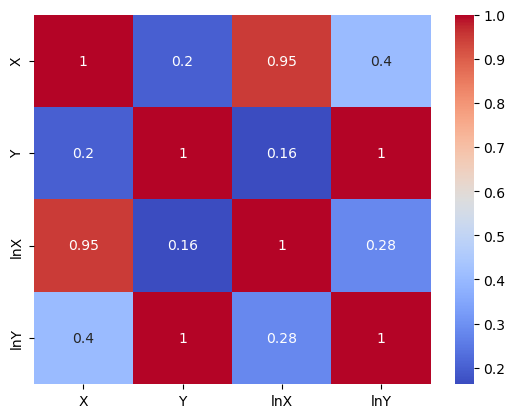

In [70]:
sns.heatmap(scaled_data.corr(),xticklabels=True, yticklabels=True,annot=True, cmap='coolwarm')
plt.xlabel(None)
plt.ylabel(None)
plt.show()

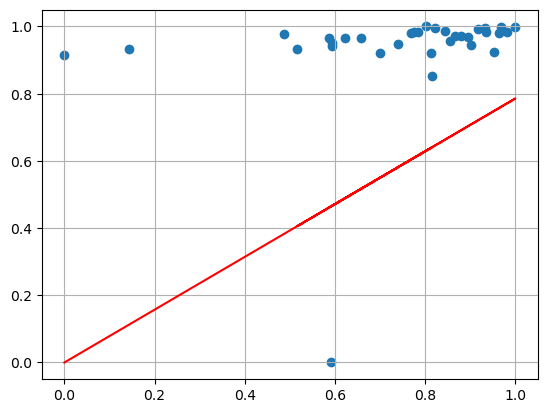

In [71]:
plt.plot(x,model.predict(x),'-r')
plt.scatter(x,y)
plt.grid()
plt.show()

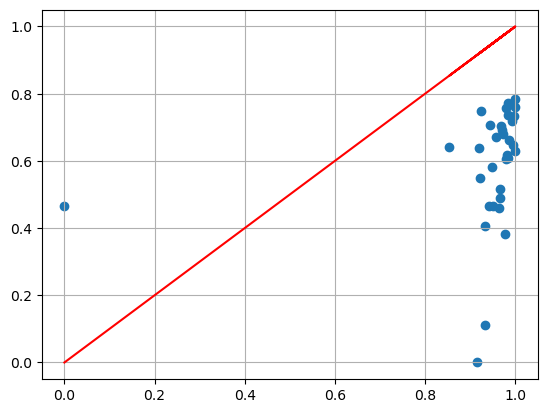

In [72]:
plt.plot(y,y,'r')
plt.scatter(y,model.predict(x))
plt.grid()
plt.show()

# Тестируем

## Проверим остатки на нормальность визуально

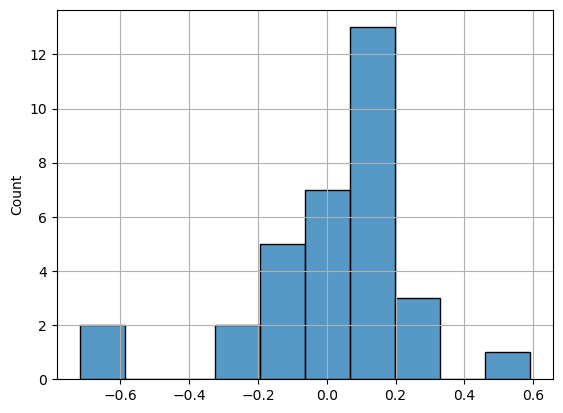

In [73]:
sns.histplot(model.resid,bins=10)
plt.grid()